In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [230]:
company = "SPCE"

twitter_df = pd.read_csv("twitter_data/{}_tweets.csv".format(company))
stock_df = pd.read_csv("stock_data/{}.csv".format(company))

In [231]:
stock_df['% change tomorrow'] = -stock_df[['Close']].pct_change(periods=-1)
stock_df = stock_df.dropna()
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df.head()

,Date,Open,High,Low,Close,Volume,% change tomorrow
0,2017-09-29,10.500,10.50,10.000,10.10,212800,-0.001984
1,2017-10-02,10.150,10.20,10.050,10.08,36500,0.001980
2,2017-10-03,10.091,10.10,10.079,10.10,13300,0.000989
3,2017-10-04,10.100,10.15,10.093,10.11,55600,-0.000990
4,2017-10-05,10.150,10.15,10.100,10.10,212500,0.003158


In [232]:
# getting the dates in order
twitter_df["datetime"] = twitter_df[['timestamp']].apply(datetime.fromtimestamp,axis=1)
twitter_df['date'] = twitter_df['datetime'].dt.date

In [233]:
#adding sentiment in
analyzer = SentimentIntensityAnalyzer()
twitter_df["sentiment_scores"] = twitter_df[['text']].apply(analyzer.polarity_scores,axis=1)
twitter_df["sentiment"] = twitter_df[['text']].apply(lambda x: analyzer.polarity_scores(x)['compound'],axis=1)

In [238]:
twitter_df.tail()

,name,timestamp,likes,isretweet,isreply,text,retweets,replies,datetime,date,sentiment_scores,sentiment
2482,virgingalactic,1562688938,202,False,False,"Pilot, Mike 'Sooch' Masucci, who was in the co...",49,1,2019-07-09 11:15:38,2019-07-09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2483,virgingalactic,1562688390,93,False,False,"Our Pilot from our second spaceflight, Mike ‘S...",10,1,2019-07-09 11:06:30,2019-07-09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2484,virgingalactic,1562687744,233,False,False,Meet our Chief Pilot and the first Scottish as...,40,6,2019-07-09 10:55:44,2019-07-09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2485,virgingalactic,1562687119,81,False,False,"Our Chief Pilot, Dave Mackay, “It was beyond a...",7,1,2019-07-09 10:45:19,2019-07-09,"{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...",0.7684
2486,virgingalactic,1562680275,111,False,False,Five members of our team have received Commerc...,11,2,2019-07-09 08:51:15,2019-07-09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


# Simple analysis

In [267]:
#this might not be too telling since there has been a lot of spam posts of late 
#(maybe filter to get rid of posts that seem like spam)
filtered_df = twitter_df[(twitter_df['retweets'] >=0) & (twitter_df['likes'] >= 0) & (twitter_df['name'] == 'virgingalactic')]
means = filtered_df[["likes", "retweets", "replies", "sentiment", "date"]].groupby(['date']).mean()
means = means.dropna()

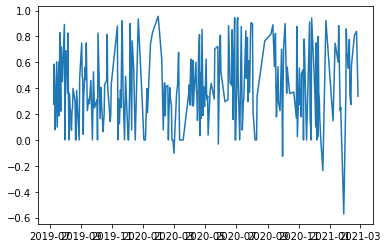

In [268]:
plt.plot(means['sentiment'])

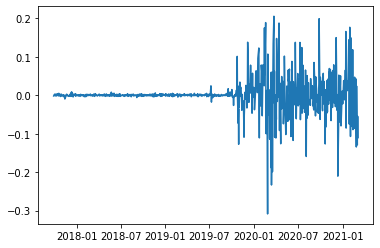

In [269]:
#filtered_for_recent = stock_df[stock_df.Date >= np.datetime64(datetime(2020, 10, 8).date())]
plt.plot(stock_df.set_index('Date')["% change tomorrow"])

In [270]:
merged = pd.merge(stock_df.set_index('Date'), means, left_index=True, right_index=True)

In [271]:
merged

,Open,High,Low,Close,Volume,% change tomorrow,likes,retweets,replies,sentiment
2019-07-09,10.930000,10.970000,10.530000,10.690000,18939100,0.008349,126.000000,31.625000,3.125000,0.276350
2019-07-10,10.800000,10.840000,10.680000,10.780000,8137300,-0.017941,232.500000,136.000000,6.500000,0.586750
2019-07-11,10.750000,10.790000,10.570000,10.590000,2540800,0.003763,133.000000,21.666667,5.333333,0.374467
2019-07-12,10.650000,10.700000,10.560000,10.630000,2730800,-0.004726,219.000000,47.000000,6.333333,0.079267
2019-07-15,10.680000,10.700000,10.551000,10.580000,658200,-0.006660,353.500000,69.000000,8.000000,0.604400
...,...,...,...,...,...,...,...,...,...,...
2021-02-12,53.349998,56.900002,52.299999,54.529999,21770900,-0.082804,3479.000000,339.000000,668.000000,0.571900
2021-02-18,47.619999,53.250000,47.009998,48.790001,21715300,0.046884,1532.000000,113.000000,96.000000,0.809700
2021-02-22,49.220001,50.798000,46.900002,47.130001,7691500,-0.067255,2107.000000,294.000000,314.000000,0.840200
2021-02-23,43.189999,44.779999,38.259998,44.160000,13666400,0.042498,793.000000,64.500000,109.000000,0.688700


In [272]:
stock_df

,Date,Open,High,Low,Close,Volume,% change tomorrow
0,2017-09-29,10.500000,10.500000,10.000000,10.100000,212800,-0.001984
1,2017-10-02,10.150000,10.200000,10.050000,10.080000,36500,0.001980
2,2017-10-03,10.091000,10.100000,10.079000,10.100000,13300,0.000989
3,2017-10-04,10.100000,10.150000,10.093000,10.110000,55600,-0.000990
4,2017-10-05,10.150000,10.150000,10.100000,10.100000,212500,0.003158
...,...,...,...,...,...,...,...
857,2021-02-26,35.750000,39.439999,35.000000,37.230000,20028400,0.023859
858,2021-03-01,38.930000,39.700001,37.580002,38.139999,8817000,-0.129405
859,2021-03-02,38.169998,38.169998,33.450001,33.770000,14643100,-0.054324
860,2021-03-03,35.099998,35.180000,31.850000,32.029999,18163300,-0.057096


In [283]:
merged['likes'].clip(upper=10000).corr(merged['% change tomorrow'])

-0.16747607489294464

In [284]:
len(merged['sentiment'])

231

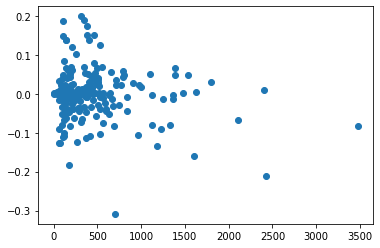

In [285]:
plt.scatter(merged['likes'].clip(upper=10000), merged['% change tomorrow'])

# :) Somewhat interesting results after filtering out spam